<a href="https://colab.research.google.com/github/Debasish9333/PRODIGY_ML_04/blob/main/Task4_PRODIGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ⚠️ **Note for Viewers:**  
> This notebook contains rich HTML outputs or interactive elements (e.g., widgets, charts, or custom visualizations) that may **not display properly on GitHub**.  
> To view the full interactive experience, please open the notebook using one of the following options:
>
> 🔗 [**Google Colab**](https://colab.research.google.com/github/Debasish9333/PRODIGY_ML_04/blob/main/Task4_PRODIGY.ipynb)  

Step 1: Install and Import Required Packages
python
Copy
Edit


In [ ]:
!pip install kagglehub tensorflow opencv-python matplotlib scikit-learn

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Step 2: Download the Dataset Using kagglehub


In [ ]:
import kagglehub

# Download the dataset to a local path
path = kagglehub.dataset_download("gti-upm/leapgestrecog")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/leapgestrecog


 Step 3: Load and Preprocess the Data

In [ ]:
import glob

data = []
labels = []
gesture_map = {
    '01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3,
    '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7,
    '09_c': 8, '10_down': 9
}

base_path = os.path.join(path, "leapGestRecog")

# Loop over all subjects
for subject in os.listdir(base_path):
    subject_path = os.path.join(base_path, subject)
    if not os.path.isdir(subject_path):
        continue
    for gesture in os.listdir(subject_path):
        gesture_path = os.path.join(subject_path, gesture)
        label = gesture_map.get(gesture)
        if label is None:
            continue
        for img_file in glob.glob(os.path.join(gesture_path, "*.png")):
            img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            data.append(img)
            labels.append(label)

data = np.array(data).reshape(-1, 64, 64, 1) / 255.0
labels = to_categorical(labels, num_classes=10)


Step 4: Train the CNN Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 185ms/step - accuracy: 0.6188 - loss: 1.1227 - val_accuracy: 0.9948 - val_loss: 0.0264
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 190ms/step - accuracy: 0.9761 - loss: 0.0835 - val_accuracy: 0.9990 - val_loss: 0.0052
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 190ms/step - accuracy: 0.9899 - loss: 0.0351 - val_accuracy: 0.9990 - val_loss: 0.0034
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 191ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.9985 - val_loss: 0.0069
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.9912 - loss: 0.0252 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 189ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9990 - val_loss: 0.0034
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 187ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - accuracy: 0.9944 - loss: 0

Step 5: Evaluate the Model

In [ ]:
score = model.evaluate(X_test, y_test)
print("Test Accuracy:", score[1])


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9991 - loss: 0.0020
Test Accuracy: 0.9990000128746033


 STEP 6: Plot Accuracy

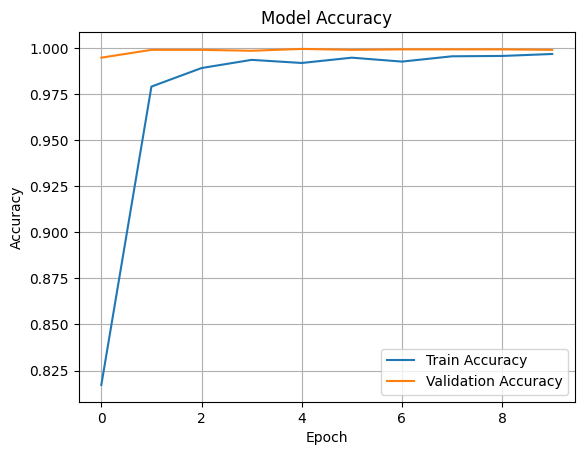

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()


 STEP 7: Evaluate the model

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Final Validation Accuracy: {acc*100:.2f}%")


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9991 - loss: 0.0020

✅ Final Validation Accuracy: 99.90%


 STEP 8:Visualize Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


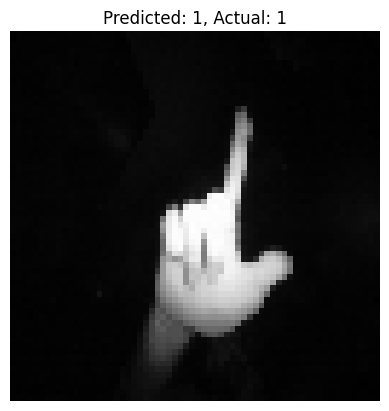

In [ ]:
import random
index = random.randint(0, len(X_test)-1)
plt.imshow(X_test[index].reshape(64, 64), cmap='gray')
plt.title(f"Predicted: {np.argmax(model.predict(X_test[index:index+1]))}, Actual: {np.argmax(y_test[index])}")
plt.axis('off')
plt.show()


STEP 9:Evaluate Model on a Confusion Matrix

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


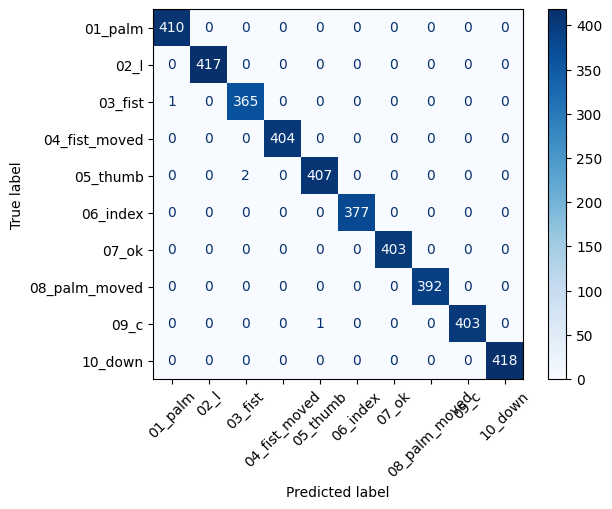

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(gesture_map.keys()))
disp.plot(cmap='Blues', xticks_rotation=45)
